In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow

In [7]:
conda install tensorflow 

^C

Note: you may need to restart the kernel to use updated packages.


In [40]:
import tensorflow  as tf
import numpy

# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

# For FORESTFIRES dataset

In [41]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [42]:
import pandas as pd

In [43]:
forestfires = pd.read_csv("C:\\Users\\Swetha\\Desktop\\EXCELR\\DS - ASSIGNMENT\\NEURAL NETWORKS\\forestfires.csv")

In [44]:
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [45]:
# Encode Data
forestfires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forestfires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [46]:
print("Head:", forestfires.head())

Head:    month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0     

In [47]:
print("Statistical Description:", forestfires.describe())

Statistical Description:             month         day        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     7.475822    4.259188   90.644681  110.872340  547.940039    9.021663   
std      2.275990    2.072929    5.520111   64.046482  248.066192    4.559477   
min      1.000000    1.000000   18.700000    1.100000    7.900000    0.000000   
25%      7.000000    2.000000   90.200000   68.600000  437.700000    6.500000   
50%      8.000000    5.000000   91.600000  108.300000  664.200000    8.400000   
75%      9.000000    6.000000   92.900000  142.400000  713.900000   10.800000   
max     12.000000    7.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain  ...    monthdec  \
count  517.000000  517.000000  517.000000  517.000000  ...  517.000000   
mean    18.889168   44.288201    4.017602    0.021663  ...    0.017408   
std      5.806625   16.

In [48]:
print("Shape:", forestfires.shape)

Shape: (517, 31)


In [49]:
print("Data Types:", forestfires.dtypes)

Data Types: month              int64
day                int64
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object


In [51]:
print("Correlation:", forestfires.corr(method='pearson'))

Correlation:              month       day      FFMC       DMC        DC       ISI  \
month     1.000000 -0.050837  0.291477  0.466645  0.868698  0.186597   
day      -0.050837  1.000000 -0.041068  0.062870  0.000105  0.032909   
FFMC      0.291477 -0.041068  1.000000  0.382619  0.330512  0.531805   
DMC       0.466645  0.062870  0.382619  1.000000  0.682192  0.305128   
DC        0.868698  0.000105  0.330512  0.682192  1.000000  0.229154   
ISI       0.186597  0.032909  0.531805  0.305128  0.229154  1.000000   
temp      0.368842  0.052190  0.431532  0.469594  0.496208  0.394287   
RH       -0.095280  0.092151 -0.300995  0.073795 -0.039192 -0.132517   
wind     -0.086368  0.032478 -0.028485 -0.105342 -0.203466  0.106826   
rain      0.013438 -0.048340  0.056702  0.074790  0.035861  0.067668   
area      0.056496  0.023226  0.040122  0.072994  0.049383  0.008258   
dayfri   -0.028562  0.158676  0.019306 -0.012010 -0.004220  0.046695   
daymon   -0.002941 -0.643220 -0.059396 -0.107921 -0

temp' has the highest correlation with the area of forest fire(which is a positive correlation), followed by 'RH' also a positive correlation, 'Rain' has the least correlation

In [149]:
dataset = forestfires.values

In [53]:
X = dataset[:,0:12]
Y = dataset[:,12]

In [61]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import RFE

In [68]:
#Feature Selection
model = ExtraTreesRegressor()

rfe = RFE(estimator=ExtraTreesRegressor(), n_features_to_select=3)

fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False  True False False False False False False False False  True  True]
Feature Ranking:  [10  1  8  9  7  6  5  4  3  2  1  1]


Wind', 'RH' and 'DMC' were top 3 selected features/feature combination for predicting 'Area' using Recursive Feature Elimination, the 2nd selected feature was atually one of the attributes with the highest correlation with the 'Area'

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

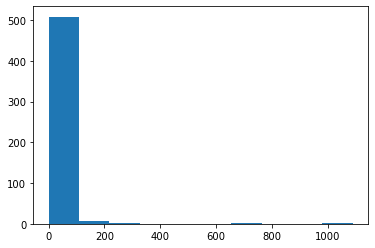

In [70]:
import matplotlib.pyplot as plt
plt.hist((forestfires.area))

Most of the dataset's samples fall between 0 and 200 of 'Area' output class, with majority being less than 100

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>],
       [<AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'dayfri'}>,
        <AxesSubplot:title={'center':'daymon'}>,
        <AxesSubplot:title={'center':'daysat'}>,
        <AxesSubplot:title={'center':'daysun'}>],
       [<AxesSubplot:title={'center':'daythu'}>,
        <AxesSubplot:title={'center':'daytue'}>,
        <AxesSubplot:title={'center':'daywed'}>,
        <AxesSubplot:title={'center':'monthapr'}>,
        <AxesSubplot:title={'center':'monthaug'}>],
       [<AxesSubplot:title={'center':'mo

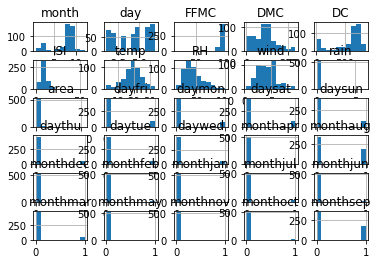

In [93]:
forestfires.hist()

'Temp' has a near Guassian Distribution. There are a mixture of positive skews and negative skews among the other attributes

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='D

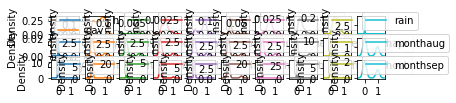

In [94]:
forestfires.plot(kind='density', subplots=True, layout=(10,10), sharex=False, sharey=False)

month          AxesSubplot(0.125,0.816017;0.065678x0.0639831)
day         AxesSubplot(0.203814,0.816017;0.065678x0.0639831)
FFMC        AxesSubplot(0.282627,0.816017;0.065678x0.0639831)
DMC         AxesSubplot(0.361441,0.816017;0.065678x0.0639831)
DC          AxesSubplot(0.440254,0.816017;0.065678x0.0639831)
ISI         AxesSubplot(0.519068,0.816017;0.065678x0.0639831)
temp        AxesSubplot(0.597881,0.816017;0.065678x0.0639831)
RH          AxesSubplot(0.676695,0.816017;0.065678x0.0639831)
wind        AxesSubplot(0.755508,0.816017;0.065678x0.0639831)
rain        AxesSubplot(0.834322,0.816017;0.065678x0.0639831)
area           AxesSubplot(0.125,0.739237;0.065678x0.0639831)
dayfri      AxesSubplot(0.203814,0.739237;0.065678x0.0639831)
daymon      AxesSubplot(0.282627,0.739237;0.065678x0.0639831)
daysat      AxesSubplot(0.361441,0.739237;0.065678x0.0639831)
daysun      AxesSubplot(0.440254,0.739237;0.065678x0.0639831)
daythu      AxesSubplot(0.519068,0.739237;0.065678x0.0639831)
daytue  

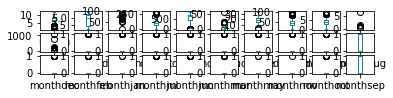

In [95]:
forestfires.plot(kind='box', subplots=True, layout=(10,10), sharex=False, sharey=False)

[Text(0, 0, 'month'),
 Text(0, 1, 'day'),
 Text(0, 2, 'FFMC'),
 Text(0, 3, 'DMC'),
 Text(0, 4, 'DC'),
 Text(0, 5, 'ISI'),
 Text(0, 6, 'temp'),
 Text(0, 7, 'RH'),
 Text(0, 8, 'wind'),
 Text(0, 9, 'rain'),
 Text(0, 10, 'area'),
 Text(0, 11, 'dayfri'),
 Text(0, 12, 'daymon'),
 Text(0, 13, 'daysat'),
 Text(0, 14, 'daysun'),
 Text(0, 15, 'daythu'),
 Text(0, 16, 'daytue'),
 Text(0, 17, 'daywed'),
 Text(0, 18, 'monthapr'),
 Text(0, 19, 'monthaug'),
 Text(0, 20, 'monthdec'),
 Text(0, 21, 'monthfeb'),
 Text(0, 22, 'monthjan'),
 Text(0, 23, 'monthjul'),
 Text(0, 24, 'monthjun'),
 Text(0, 25, 'monthmar'),
 Text(0, 26, 'monthmay'),
 Text(0, 27, 'monthnov'),
 Text(0, 28, 'monthoct'),
 Text(0, 29, 'monthsep'),
 Text(0, 30, 'size_category')]

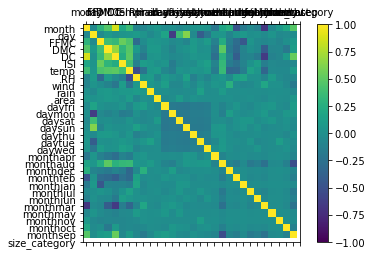

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(forestfires.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,31,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(forestfires.columns)
ax.set_yticklabels(forestfires.columns)

'cement' has the highest positive corelation as expected

In [100]:
num_instances = len(X)

In [103]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [112]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler


In [117]:
models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

In [118]:
# Evaluations
results = []
names = []
scoring = []

In [119]:
for name, model in models:
    # Fit the model
    model.fit(X, Y)
    predictions = model.predict(X)

In [120]:
# Evaluate the model
score = explained_variance_score(Y, predictions)
mae = mean_absolute_error(predictions, Y)
# print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
results.append(mae)
names.append(name)
    
msg = "%s: %f (%f)" % (name, score, mae)
print(msg)

SVM: 0.007164 (0.213090)


In [122]:
models = []
models.append(('LiR', LinearRegression()))
for name, model in models:
    # Fit the model
    model.fit(X, Y)
    predictions = model.predict(X)
score = explained_variance_score(Y, predictions)
mae = mean_absolute_error(predictions, Y)
# print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
results.append(mae)
names.append(name)    
msg = "%s: %f (%f)" % (name, score, mae)
print(msg)

LiR: 0.447533 (0.201420)


In [131]:
models = []
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
for name, model in models:
    # Fit the model
    model.fit(X, Y)
    predictions = model.predict(X)
score = explained_variance_score(Y, predictions)
mae = mean_absolute_error(predictions, Y)
# print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
results.append(mae)
names.append(name)    
msg = ("%s: %f (%f)" % (name, score, mae))
print("%s: %f (%f)" % (name, score, mae))

ExtraTreesRegressor: 1.000000 (0.000000)


Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

# For gas turbines datasets

In [134]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [135]:
import pandas as pd

In [204]:
dataset= pd.read_csv("C:\\Users\\Swetha\\Desktop\\EXCELR\\DS - ASSIGNMENT\\NEURAL NETWORKS\\gas_turbines.csv")
dataset.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [205]:
dataset.shape

(15039, 11)

In [206]:
print("Shape:", dataset.shape)

Shape: (15039, 11)


In [207]:
print("Data Types:", dataset.dtypes)

Data Types: AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object


In [208]:
print("Statistical Description:", dataset.describe())

Statistical Description:                  AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803  

In [209]:
print("Correlation:", dataset.corr(method='pearson'))

Correlation:             AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT 

In [253]:
X = dataset[:,0:2]
Y = dataset[:,10]

TypeError: '(slice(None, None, None), slice(0, 2, None))' is an invalid key

In [216]:
X

array([[3, 5],
       [10, 2],
       [10, 6],
       ...,
       [8, 7],
       [8, 6],
       [11, 2]], dtype=object)

In [217]:
Y

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36, 0.43, 0.47, 0.55,
       0.61, 0.71, 0.77, 0.9, 0.95, 0.96, 1.07, 1.12, 1.19, 1.36, 1.43,
       1.46, 1.46, 1.56, 1.61, 1.63, 1.64, 1.69, 1.75, 1.9, 1.94, 1.95,
       2.01, 2.14, 2.29, 2.51, 2.53, 2.55, 2.57, 2.69, 2.74, 3.07

In [218]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import RFE

In [219]:
#Feature Selection
model = ExtraTreesRegressor()

rfe = RFE(estimator=ExtraTreesRegressor(), n_features_to_select=3)

fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  2
Selected Features:  [ True  True]
Feature Ranking:  [1 1]


(array([[ 22.,  54.,   9.,   2.,  17.,  32., 184., 172.,  15.,  10.],
        [138.,  54.,  61.,  85.,  84.,  95.,   0.,   0.,   0.,   0.]]),
 array([1.0, 2.1, 3.2, 4.300000000000001, 5.4, 6.5, 7.6000000000000005,
        8.700000000000001, 9.8, 10.9, 12.0], dtype=object),
 <a list of 2 BarContainer objects>)

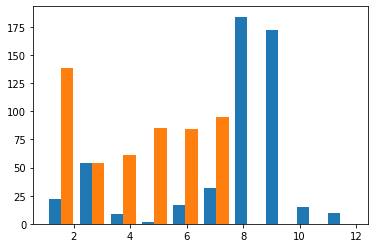

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(X)

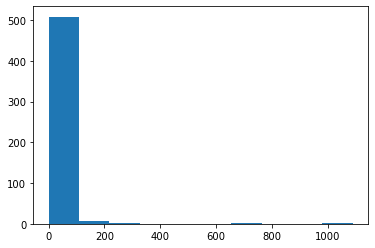

In [221]:
plt.hist(Y)
plt.show()

In [222]:
dataset.head(5)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [223]:
a = numpy.array(["AT","AP","AH","AFDP","GTEP","TIT","TAT","TEY","CDP","CO","NOX"])
unique, counts = numpy.unique(a, return_counts=True)
dict(zip(unique, counts))

{'AFDP': 1,
 'AH': 1,
 'AP': 1,
 'AT': 1,
 'CDP': 1,
 'CO': 1,
 'GTEP': 1,
 'NOX': 1,
 'TAT': 1,
 'TEY': 1,
 'TIT': 1}

(array([ 236., 1297., 1877., 2005., 1880., 2190., 2278., 1884., 1088.,
         304.]),
 array([ 0.5223 ,  3.96297,  7.40364, 10.84431, 14.28498, 17.72565,
        21.16632, 24.60699, 28.04766, 31.48833, 34.929  ]),
 <BarContainer object of 10 artists>)

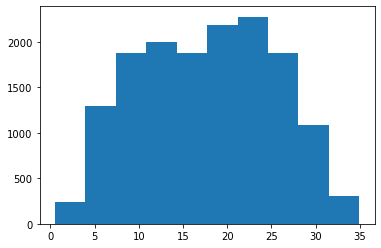

In [225]:
plt.hist((dataset.AT))

array([[<AxesSubplot:title={'center':'AT'}>,
        <AxesSubplot:title={'center':'AP'}>,
        <AxesSubplot:title={'center':'AH'}>],
       [<AxesSubplot:title={'center':'AFDP'}>,
        <AxesSubplot:title={'center':'GTEP'}>,
        <AxesSubplot:title={'center':'TIT'}>],
       [<AxesSubplot:title={'center':'TAT'}>,
        <AxesSubplot:title={'center':'TEY'}>,
        <AxesSubplot:title={'center':'CDP'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'NOX'}>, <AxesSubplot:>]],
      dtype=object)

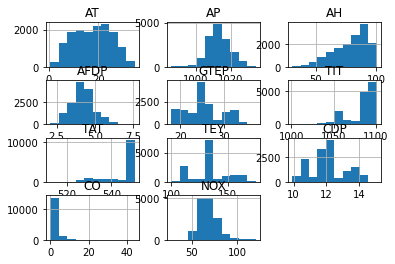

In [224]:
dataset.hist()

In [228]:
import warnings
warnings.fiterwarnings('ignore')

AttributeError: module 'warnings' has no attribute 'fiterwarnings'

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

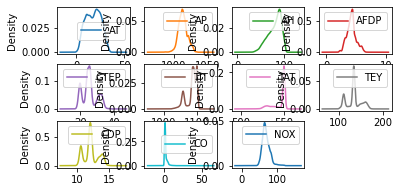

In [229]:
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

AT          AxesSubplot(0.125,0.71587;0.168478x0.16413)
AP       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
AH       AxesSubplot(0.529348,0.71587;0.168478x0.16413)
AFDP     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
GTEP       AxesSubplot(0.125,0.518913;0.168478x0.16413)
TIT     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
TAT     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
TEY     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
CDP        AxesSubplot(0.125,0.321957;0.168478x0.16413)
CO      AxesSubplot(0.327174,0.321957;0.168478x0.16413)
NOX     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

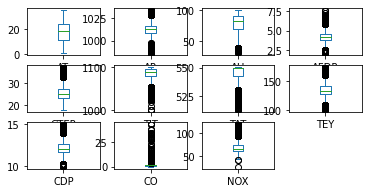

In [230]:
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

[Text(0, 0, 'AT'),
 Text(0, 1, 'AP'),
 Text(0, 2, 'AH'),
 Text(0, 3, 'AFDP'),
 Text(0, 4, 'GTEP'),
 Text(0, 5, 'TIT'),
 Text(0, 6, 'TAT'),
 Text(0, 7, 'TEY'),
 Text(0, 8, 'CDP'),
 Text(0, 9, 'CO'),
 Text(0, 10, 'NOX')]

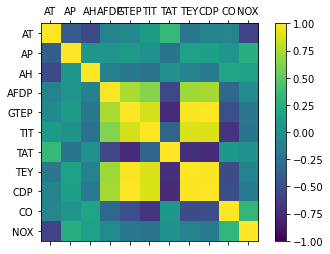

In [232]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)

In [233]:
models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

In [234]:
for name, model in models:
    # Fit the model
    model.fit(X, Y)
    predictions = model.predict(X)

In [235]:
# Evaluate the model
score = explained_variance_score(Y, predictions)
mae = mean_absolute_error(predictions, Y)
# print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
results.append(mae)
names.append(name)
    
msg = "%s: %f (%f)" % (name, score, mae)
print(msg)

SVM: 0.000122 (12.738801)


In [236]:
models = []
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
for name, model in models:
    # Fit the model
    model.fit(X, Y)
    predictions = model.predict(X)
score = explained_variance_score(Y, predictions)
mae = mean_absolute_error(predictions, Y)
# print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
results.append(mae)
names.append(name)    
msg = ("%s: %f (%f)" % (name, score, mae))
print("%s: %f (%f)" % (name, score, mae))

ExtraTreesRegressor: 0.052860 (18.228551)


In [237]:
models = []
models.append(('LiR', LinearRegression()))
for name, model in models:
    # Fit the model
    model.fit(X, Y)
    predictions = model.predict(X)
score = explained_variance_score(Y, predictions)
mae = mean_absolute_error(predictions, Y)
# print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
results.append(mae)
names.append(name)    
msg = "%s: %f (%f)" % (name, score, mae)
print(msg)

LiR: 0.003875 (18.492840)


In [238]:
models = []
models.append(('KNN', KNeighborsRegressor()))
for name, model in models:
    # Fit the model
    model.fit(X, Y)
    predictions = model.predict(X)
score = explained_variance_score(Y, predictions)
mae = mean_absolute_error(predictions, Y)
# print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
results.append(mae)
names.append(name)    
msg = "%s: %f (%f)" % (name, score, mae)
print(msg)

KNN: 0.002920 (13.204530)
